# Test Case 9 - Oscillating Circuit

In [1]:
from CircuitCalculator.Circuit.state_space_model import numeric_state_space_model
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit.Components import components as cmp
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

## Setup Circuit

In [2]:
V0 = 5
R = 2
L = 2e-3
C = 0.5e-3
circuit = Circuit(
    components=[
        cmp.dc_voltage_source(id='Vq', V=V0, nodes=('1', '0')),
        cmp.resistor(id='R', R=R, nodes=('1', '2')),
        cmp.inductance(id='L', L=L, nodes=('2', '3')),
        cmp.capacitor(id='C', C=C, nodes=('3', '0')),
    ],
    ground_node='0'
)

In [3]:
from CircuitCalculator.Circuit.circuit import transform_circuit
network = transform_circuit(circuit, w=0)

### Setup Solution

In [4]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [5]:
t_max = 0.02
t0 = 0.001
Ts = t_max/1000
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)

### Calculate Solution

In [6]:
ssm = numeric_state_space_model(circuit=circuit, potential_nodes=['1', '2', '3'], voltage_ids=['Vq', 'R', 'L', 'C'], current_ids=['R', 'L', 'C', 'Vq'])
sys = signal.StateSpace(ssm.A, ssm.B, ssm.C, ssm.D)
tout, yout, xout = signal.lsim(sys, V, t)

### Calculate Reference Solution

In [7]:
w0 = 1/np.sqrt(L*C)
d = R/2/L
we = np.sqrt(w0**2-d**2)

tref = tout-t0

i_ref = V/we/L*np.exp(-d*tref)*np.sin(we*tref)

uR_ref = i_ref*R
uL_ref = V/we*(-d*np.exp(-d*tref)*np.sin(we*tref)+np.exp(-d*tref)*np.cos(we*tref)*we)

phi1_ref = V
phi2_ref = V-i_ref*R
phi3_ref = phi2_ref-uL_ref

uC_ref = phi3_ref

### Plot Solution

/Users/chris/Workspace/CircuitCalculator/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.02)

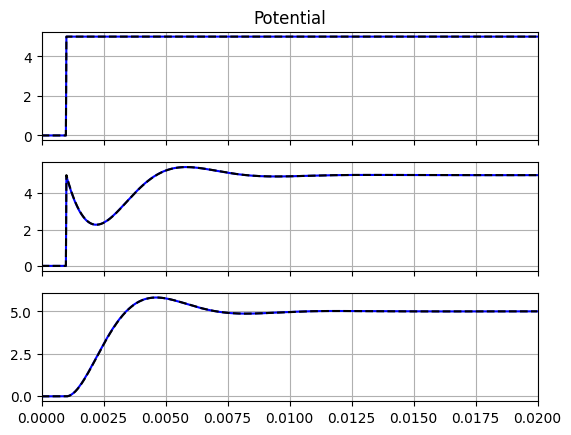

In [8]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(tout, yout[:,0], 'b-')
ax[0].plot(t, phi1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(tout, yout[:,1], 'b-')
ax[1].plot(tout, phi2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,2], 'b-')
ax[2].plot(tout, phi3_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.02)

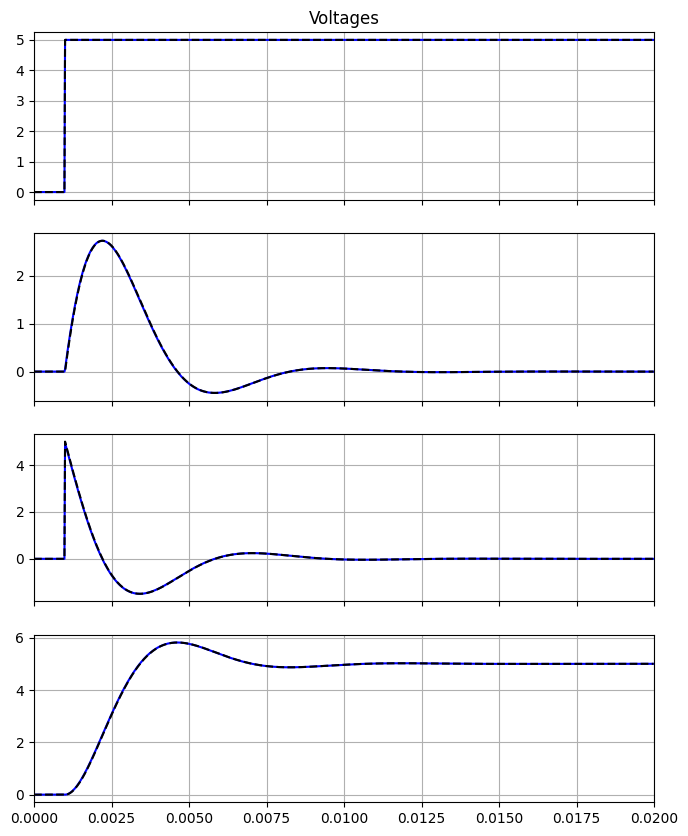

In [9]:
_, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,3], 'b-')
ax[0].plot(t, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(tout, yout[:,4], 'b-')
ax[1].plot(tout, uR_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,5], 'b-')
ax[2].plot(tout, uL_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,6], 'b-')
ax[3].plot(tout, uC_ref, 'k--')
ax[3].grid(True)
ax[3].set_xlim((0, t_max))

(0.0, 0.02)

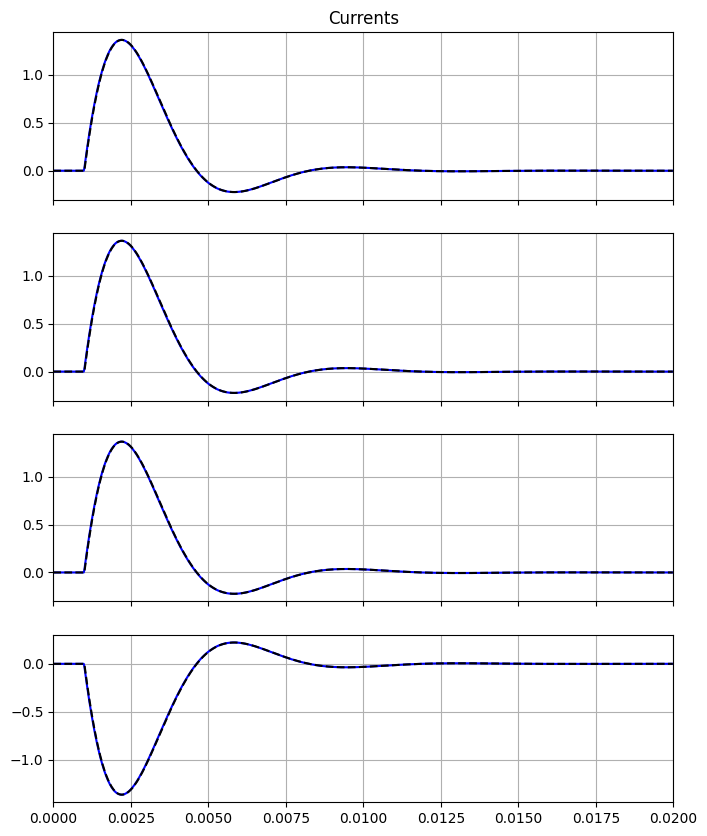

In [10]:
_, ax = plt.subplots(nrows=4, sharex=True, figsize=(8, 10))
ax[0].plot(tout, yout[:,7], 'b-')
ax[0].plot(t, i_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(tout, yout[:,8], 'b-')
ax[1].plot(tout, i_ref, 'k--')
ax[1].grid(True)

ax[2].plot(tout, yout[:,9], 'b-')
ax[2].plot(tout, i_ref, 'k--')
ax[2].grid(True)

ax[3].plot(tout, yout[:,10], 'b-')
ax[3].plot(tout, -i_ref, 'k--')
ax[3].grid(True)
ax[3].set_xlim((0, t_max))